In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time



In [2]:
"Generating: field of views and prices for sensors and weights (critical indices) for ROI points"



K =100       # = Total number of points is all the regions of interest (RoIs) 
n=3          # = number of possible places on a car to put a sensor 
m=2          # = number of diff types of sensors 
L=n*m                  # = number of qubits
dim=np.power(2,L)      # = dimension of the qubit Hilbert space

#--------------------------------------------------------------------------------------

R=np.array(range(K))+1         # The set of (the lables of) all ROI-points 1,2,3,...,K

maxFoVSize=int(np.floor(K/2)) # max number of points can be in a field of view (FoV) of a sensor 


nFoVs= np.array([ ], dtype=int) 
for i in range(n):                                       # False, meaning that a value be selected only one time.
    fov = np.random.choice(R, maxFoVSize, replace=False) # FoV of every sensor at ith position will be its subset
    nFoVs = np.append(nFoVs, fov) 

Nfov = len(np.unique(nFoVs)) # Total number of distinct points is all the above n FoVs
notInFoV = K-Nfov            # Total number of points of RoIs that are NOT covered in the above n FoVs 

nFoVs = np.reshape(nFoVs, (n,maxFoVSize))   # all n FoVs, one for each position

#print(nFoVs)


#--------------------------------------------------------------------------------------

" FoV for lth specification (jst senseor at ist position) l=i*j   i=1,..,n   j=1,...,m   l=1,...,L   L=nxm "

FoVSize = np.random.randint(1, high=maxFoVSize+1, size=m) # rand int from low (inclusive) to high (exclusive)


FoV= [] 
for i in range(n):
    for j in range(m):
        f = np.random.choice(nFoVs[i], FoVSize[j], replace=False) 
        #print(f)
        FoV.append(f)        

#print(FoV)

#--------------------------------------------------------------------------------------
" Weights (critical indices) associated to ROI points k = 1, ..., K   "


W=np.ones(K)            # weight(critical index) = importance to a point, all w =1
#W=np.random.rand(1, K)  # w = random float number from a uniform distribution over [0, 1)
#print(W)

#--------------------------------------------------------------------------------------
" Prices of senseor j = 1, ..., m   "

maxPrice= (np.mean(W)*K)/m                       # max possible price of a sensor
prices = maxPrice*np.random.rand(1, m)           # prices of diff sensors 
#print(prices)


#--------------------------------------------------------------------------------------



print("============================================= ")

print("Total number of points in all the RoIs = K = ", K)
print("number of possible places on a car to put a sensor = n = ", n)

print("---------------------------------------------- ")

print("Total number of points NOT in the above n FoVs = ", notInFoV, "(should be close to 0)") 

print("number of diff types of sensors = m = ", m),
print("For j=1,...,m, number of points in the field of view of jth sensor = ", FoVSize),
print("max number of points can be in a field of view (FoV) of a sensor = ", maxFoVSize),

print("---------------------------------------------- ")

print("number of qubits L = m*n = ", L)
print("dimension of the qubit Hilbert space = 2^L = ", dim )

print("---------------------------------------------- ")

print("max possible price of a sensor = ",maxPrice)


print("============================================= ")

print(np.mean(W), np.mean(prices) )
print( -K*np.mean(W), m*n*np.mean(prices) )



Total number of points in all the RoIs = K =  100
number of possible places on a car to put a sensor = n =  3
---------------------------------------------- 
Total number of points NOT in the above n FoVs =  11 (should be close to 0)
number of diff types of sensors = m =  2
For j=1,...,m, number of points in the field of view of jth sensor =  [13 43]
max number of points can be in a field of view (FoV) of a sensor =  50
---------------------------------------------- 
number of qubits L = m*n =  6
dimension of the qubit Hilbert space = 2^L =  64
---------------------------------------------- 
max possible price of a sensor =  50.0
1.0 31.95102066283956
-100.0 191.70612397703735


In [3]:
" PRICE_l and binary FoV_l "


tic = time.time() # Start the stopwatch 
#--------------------------------------------------------------------------------------

PRICEs = prices*np.ones((n,m)) # nxm price matrix, we assume price of to put a sensor is independent of position
PRICEs = np.reshape(PRICEs,L) # price for lth specification (jst senseor at ist position) l=i*j= 1,...,L 

#--------------------------------------------------------------------------------------
'''
row at (i,j) is a binary FoV for (i,j)th specification, each row is of length NN: 
at kth place 0 (means kth point no cover) 1(means kth point got cover)
''' 

FOVbin = np.zeros((L, K)) # Initialization
for l in range(L):
    fov = FoV[l] # FoV of jth sensor at ith place, where l=i*j
    for s in range(len(fov)):
        FOVbin[l][fov[s]-1] = 1 # binary-FoV-row-vector for jth sensor at ith place: 

#--------------------------------------------------------------------------------------

tock = time.time() # Stop the stopwatch 
CPUtime0 = tock-tic
print("CPUtime = ", CPUtime0, "seconds")

#------------------------------------------EXTRA--------------------------------------------

#print(prices)
#print(PRICEs)
#print(FoV)
#print(FOVbin)

CPUtime =  0.001154184341430664 seconds


In [4]:
"Pauli oprators" 

X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
P0 = np.array([[1,0],[0,0]]) # projector on |0><0|

I2 = np.identity(2)    # single qubit Identity Matrix 
Id = np.identity(dim)  # L qubits Identity Matrix

Y


array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [5]:
" building Hamiltonian H "

a = 1 # weightage give to cover
b = 1 # weightage give to price

#--------------------------------------------------------------------------------------

Hin = np.zeros((dim,dim)) # 0 Initailization of Hamiltonion 


#--------------------------------------------------------------------------------------
H = Hin  # 1st part of Hamiltonion associated with the total cover

for k in range(K):
    proj = FOVbin[0][k]*P0 +(1-FOVbin[0][k])*I2 # puting P0 (FOVlbin_lk=1) or I (FOVlbin_lk=0) for l=0
    for l in range(L-1):
        proj = np.kron(proj, FOVbin[l+1][k]*P0 +(1-FOVbin[l+1][k])*I2) # for l+1= 1,..,L-1, 
    H = H + W[[k]]*(Id-proj)                                           # np.kron = Kronecker Product
    

#print(H) 
Htot = -a*H

#--------------------------------------------------------------------------------------

IL = np.identity(L)
H = Hin  # 2nd part of Hamiltonion associated with the total price


for ll in range(L):
    proj = IL[0][ll]*P0 +(1-IL[0][ll])*I2 # puting P0 (IL_l,ll=1) or I (IL_l,ll=0) for l=0
    for l in range(L-1):
        proj = np.kron(proj, IL[l+1][ll]*P0 +(1-IL[l+1][ll])*I2) # for l+1= 1,..,L-1
    H = H + PRICEs[l]*(Id-proj) 
    

#print(H)    
Htot = Htot + b*H # Total Hamiltonion 
print(Htot)     


#------------------------------------------EXTRA--------------------------------------------

#print(FOVbin)
#print(proj)
#np.kron(np.kron(P0,P0),P0)


[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         -22.15864847   0.         ...   0.           0.
    0.        ]
 [  0.           0.           7.84135153 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  19.20675763   0.
    0.        ]
 [  0.           0.           0.         ...   0.          31.20675763
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   40.04810915]]


In [6]:
"optimal solution by Exact diagonalization of Htot: Emin" 

DiagH = np.diag(Htot)  # energy(cost) values = diagonal values
print(DiagH) 

#--------------------------------------------------------------------------------------

Emax = np.max(DiagH)             # Global Man energy(cost) 
Emin = np.min(DiagH)             # Global min energy(cost)


pos = np.where(DiagH==Emin) # diagonal entry(ies) e corresponding to global min energy
pos1 = pos[0][0]            # 1st e, corresponding min-energy-quantum-kets |e>  

OptimalSolsX = np.binary_repr(pos1, width=L)  # Binarized e which gives |e> in form of qubit-kets


#--------------------------------------------------------------------------------------



print("============================================= ")

print("Max energy = ", Emax)
print("Global min = cost associated with the optimal solution = ", Emin)

print("---------------------------------------------- ")

print("the optimal solutions = ", pos[0]) 
print("1st optimal solution (binary form) = ", OptimalSolsX)
    
print("---------------------------------------------- ")

 
#np.reshape(OptimalSolsX,(n,m)) #OptimalSolsX

[  0.         -22.15864847   7.84135153  -2.31729695 -22.15864847
 -28.31729695  -8.31729695  -7.47594542   7.84135153 -10.31729695
  18.68270305   9.52405458  -2.31729695  -7.47594542  12.52405458
  13.3654061  -22.15864847 -27.31729695  -9.31729695  -6.47594542
 -24.31729695 -20.47594542  -8.47594542   0.3654061  -10.31729695
 -13.47594542   4.52405458   7.3654061   -4.47594542   0.3654061
  12.3654061   21.20675763   7.84135153  -8.31729695  17.68270305
  11.52405458  -9.31729695 -10.47594542   6.52405458  10.3654061
  16.68270305   3.52405458  28.52405458  23.3654061   11.52405458
  10.3654061   27.3654061   31.20675763  -6.31729695  -9.47594542
   7.52405458  11.3654061   -6.47594542  -1.6345939   10.3654061
  19.20675763   6.52405458   4.3654061   21.3654061   25.20675763
  14.3654061   19.20675763  31.20675763  40.04810915]
Max energy =  40.04810915161529
Global min = cost associated with the optimal solution =  -28.31729694946157
---------------------------------------------- 


In [7]:
" generators for building U(theta) "

#IL = np.identity(L)

Gs = []
for ll in range(L):
    gen = IL[0][ll]*Y + (1-IL[0][ll])*I2 # puting Y (IL_l,ll=1) or I (IL_l,ll=0) for l=0
    for l in range(L-1):
        gen = np.kron(gen, IL[l+1][ll]*Y +(1-IL[l+1][ll])*I2) # for l+1= 1,..,L-1
    Gs.append(gen)  


Ng = L # number of generators


#--------------------------------------------------------------------------------------

" Unitary(theta) "


def U(theta, GEN): # input zz is a row matrix and W_mat is a weight (square) matrix
    unitary = np.cos(theta)*Id - 1j*np.sin(theta)*GEN
    return unitary



#------------------------------------------EXTRA--------------------------------------------

print(Gs[0])    
#Gs[1]==np.kron(np.kron(I2,Y),I2)

#print(Ng,L)
#U(np.pi/4, Gs[0])

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [8]:
'''Initialization for Gradient Descent (GD) '''


kk = dim-1      # the final sol depends on |psi_in> =|kk> choose kk = 0 or dim-1 

psi_in = np.zeros((1, dim))
psi_in[0][kk] = 1
psi_in = psi_in.T   # column matrix


Ein = (np.conjugate(psi_in.T) @ Htot @ psi_in)[0][0]

#--------------------------------------------------------------------------------------


theta_in = (np.pi)*np.random.rand(Ng)  # angles for Unitary(theta) in [0, pi)



#------------------------------------------EXTRA--------------------------------------------

#print(psi_in)
print(Ein, theta_in)
DiagH




40.04810915161529 [1.22766146 0.79660716 2.88565041 0.96154486 0.87589685 1.959094  ]


array([  0.        , -22.15864847,   7.84135153,  -2.31729695,
       -22.15864847, -28.31729695,  -8.31729695,  -7.47594542,
         7.84135153, -10.31729695,  18.68270305,   9.52405458,
        -2.31729695,  -7.47594542,  12.52405458,  13.3654061 ,
       -22.15864847, -27.31729695,  -9.31729695,  -6.47594542,
       -24.31729695, -20.47594542,  -8.47594542,   0.3654061 ,
       -10.31729695, -13.47594542,   4.52405458,   7.3654061 ,
        -4.47594542,   0.3654061 ,  12.3654061 ,  21.20675763,
         7.84135153,  -8.31729695,  17.68270305,  11.52405458,
        -9.31729695, -10.47594542,   6.52405458,  10.3654061 ,
        16.68270305,   3.52405458,  28.52405458,  23.3654061 ,
        11.52405458,  10.3654061 ,  27.3654061 ,  31.20675763,
        -6.31729695,  -9.47594542,   7.52405458,  11.3654061 ,
        -6.47594542,  -1.6345939 ,  10.3654061 ,  19.20675763,
         6.52405458,   4.3654061 ,  21.3654061 ,  25.20675763,
        14.3654061 ,  19.20675763,  31.20675763,  40.04

In [17]:

'''iterations start here for gradient descent (GD)'''

t1_start = time.time() # Start the stopwatch


Itrs = 30
alpha = 0.01    #Gradient Descent Step Size


#--------------Initialization--------------

ANGs = np.array([theta_in])        # iteration vs Sequence of solution-angles
Engs = np.array([Ein])                       # iteration vs Total energy 



#---------------------------------------------------

for itr in range(Itrs): # itr = 0,1,2,...,(Itrs-1)
    
    t = ANGs[-1]
    
    #------------- TTpTm = {theta, theta + pi/4, theta - pi/4} ------------------
    
    TTpTm = np.array([t]) 
    
    t_tiles = np.tile(t, (Ng, 1))
    Ipi4 = (np.pi/4)*np.identity(Ng)
    
    tp = t_tiles + Ipi4
    tn = t_tiles - Ipi4 #np.reshape(t,(1,Ng))
    
    TTpTm = np.append(TTpTm, tp, axis=0) # axis=0 row wise append
    TTpTm = np.append(TTpTm, tn, axis=0) # row by row putting sequence of angles
    #print(TTpTm)
    
    Nang = 1 + 2*Ng # = Length of TTpTm = total number of angles
    
    #-----------------------------------------------------------------------------
    
    PSIs=[]
    for jj in range(Nang):
        psi = psi_in
        for l in range(L):
            psi = U(TTpTm[jj][l], Gs[l]) @ psi
        PSIs.append(psi)
    
    #-----------------------------------------------------------------------------
        
    eng = (np.conjugate(PSIs[0].T) @ Htot @ PSIs[0])[0][0].real
    Engs = np.append(Engs, eng)           # energy before update
    #print(eng)
    
    #-----------------------------------------------------------------------------

    grad = np.array([])
    for gg in range(Ng):
        dHdt = np.conjugate(PSIs[gg+1].T) @ Htot @ PSIs[gg+1] - np.conjugate(PSIs[gg+1+Ng].T) @ Htot @ PSIs[gg+1+Ng]
        dHdt = dHdt[0][0].real
        grad = np.append(grad, dHdt)
    
    #print(grad)
    
    #-----------------------------------------------------------------------------
    
    t = t - alpha*grad
    ANGs = np.append(ANGs, np.reshape(t,(1,Ng)), axis=0)
    #print(t)
    
    #-----------------------------------------------------------------------------
    
    if itr % 1 == 0: # when i is a multiple of 1
        print(itr, eng)
        
    #-----------------------------------------------------------------------------

        
        
t1_stop = time.time() # Stop the stopwatch 
time_taken = t1_stop - t1_start 
print("(Gradient Descent) time taken in sec. = ", time_taken)


#print(Engs)
#print(ANGs)


0 3.9195919218010826
1 -0.377569615458363
2 -4.368707878125387
3 -7.980105409576703
4 -11.299087994909975
5 -14.401092481389824
6 -17.210754418387275
7 -19.546601659999205
8 -21.286570885488615
9 -22.46427786588002
10 -23.220796261431147
11 -23.71046469531169
12 -24.050219921553264
13 -24.313874459712487
14 -24.54340864553196
15 -24.760857835782915
16 -24.976499108587948
17 -25.19374310384287
18 -25.411969202671965
19 -25.628262174319303
20 -25.83860367861779
21 -26.038770549910218
22 -26.225012560310184
23 -26.394504669545704
24 -26.545563134948367
25 -26.677646108834313
26 -26.79119411073686
27 -26.88738292238701
28 -26.96785649983595
29 -27.03448790037658
(Gradient Descent) time taken in sec. =  0.12393879890441895


Gradient Descent Step Size = 0.01


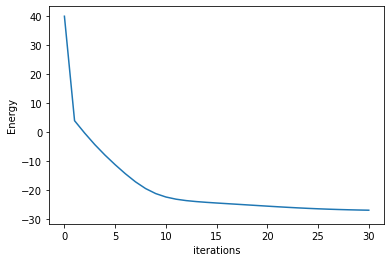

In [18]:

plt.plot(Engs)
plt.plot(Emin)
plt.ylabel('Energy')
plt.xlabel('iterations')
plt.title(print("Gradient Descent Step Size =", alpha))
plt.show()


In [19]:


VQEmin = np.min(Engs)            # Min energy provieds the VQE Psi_Solution
EmPos = np.where(Engs==VQEmin)   # min energy position in Engs
EmPos1 = EmPos[0][0]             # 1st position
#print(Engs, VQEmin, EmPos1, Ein)


VQEminAng = ANGs[EmPos1]         # angles (parameters) for the obtained VQE Psi_Solution
#print(ANGs, VQEminAng, theta_in)

#------------------------------------- psi_out ----------------------------------------
psi = psi_in
for l in range(L):
    psi = U(VQEminAng[l], Gs[l]) @ psi  


#print(psi)  
#-----------------------------------------------------------------------------

overlaps = np.reshape(np.abs(psi),dim)   # = |<x|psi_out>|
max_overlap = np.max(overlaps) 
VQESol = np.where(overlaps == max_overlap)  # VQE solutions x
VQESol1 = VQESol[0][0]                      # VQE 1st solution
Eng_VQESol1 = DiagH[VQESol1]                # Energy associated with the VQE solution

print(max_overlap, VQESol1, Eng_VQESol1)

#-----------------------------------------------------------------------------
overlaps
#DiagH

0.978562186629053 17 -27.31729694946157


array([4.43847764e-04, 2.27694285e-03, 7.66646827e-10, 3.93290481e-09,
       3.45533041e-05, 1.77258747e-04, 5.96830334e-11, 3.06174475e-10,
       1.44108960e-07, 7.39280204e-07, 2.48915700e-13, 1.27693968e-12,
       1.12188032e-08, 5.75525569e-08, 1.93779502e-14, 9.94090513e-14,
       1.90752543e-01, 9.78562187e-01, 3.29481961e-07, 1.69024530e-06,
       1.48499805e-02, 7.61805276e-02, 2.56499893e-08, 1.31584666e-07,
       6.19337368e-05, 3.17720602e-04, 1.06976551e-10, 5.48790625e-10,
       4.82150732e-06, 2.47343740e-05, 8.32806558e-12, 4.27230480e-11,
       6.36834714e-10, 3.26696756e-09, 1.09998822e-15, 5.64294904e-15,
       4.95772320e-11, 2.54331626e-10, 8.56334776e-17, 4.39300477e-16,
       2.06768166e-13, 1.06072247e-12, 3.57145336e-19, 1.83215864e-18,
       1.60967879e-14, 8.25766606e-14, 2.78035678e-20, 1.42632542e-19,
       2.73692584e-07, 1.40404531e-06, 4.72742161e-13, 2.42517135e-12,
       2.13068170e-08, 1.09304154e-07, 3.68027170e-14, 1.88798255e-13,
      

In [20]:

print("Max energy = ", Emax)
print("Global min = cost associated with the optimal solution = ", Emin)

print("---------------------------------------------- ")

print("optimal solutions = ", pos[0]) 
print("1st optimal solution (binary form) = ", OptimalSolsX)
    
print("---------------------------------------------- ")
print("VQE 1st solution = ", VQESol1)
print("Energy associated with the VQE solution = ", Eng_VQESol1)
print("<psi_out|H|psi_out> = ", VQEmin)

print("---------------------------------------------- ")

print("Gradient Descent time taken in sec. = ", time_taken )
print("Gradient Descent Step Size =",  alpha)


print("============================================= ")

print("Total number of points in all the RoIs = K = ", K)
print("number of possible places on a car to put a sensor = n = ", n)
print("number of diff types of sensors = m = ", m),
print("number of qubits L = m*n = ", L)
print("dimension of the qubit Hilbert space = 2^L = ", dim )



Max energy =  40.04810915161529
Global min = cost associated with the optimal solution =  -28.31729694946157
---------------------------------------------- 
optimal solutions =  [5]
1st optimal solution (binary form) =  000101
---------------------------------------------- 
VQE 1st solution =  17
Energy associated with the VQE solution =  -27.31729694946157
<psi_out|H|psi_out> =  -27.03448790037658
---------------------------------------------- 
Gradient Descent time taken in sec. =  0.12393879890441895
Gradient Descent Step Size = 0.01
Total number of points in all the RoIs = K =  100
number of possible places on a car to put a sensor = n =  3
number of diff types of sensors = m =  2
number of qubits L = m*n =  6
dimension of the qubit Hilbert space = 2^L =  64
